In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/clean_data.csv', index_col='tmdb_id')

df['year'] = df['year'].astype('Int32')

In [3]:
def removeOutliers(dtf, *columns):
    for i in range(len(columns)):
        q_low = dtf[columns[i]].quantile(0.01)
        q_hi  = dtf[columns[i]].quantile(0.99)
        dtf = dtf[(df[columns[i]] < q_hi) & (dtf[columns[i]] > q_low)]
    return dtf

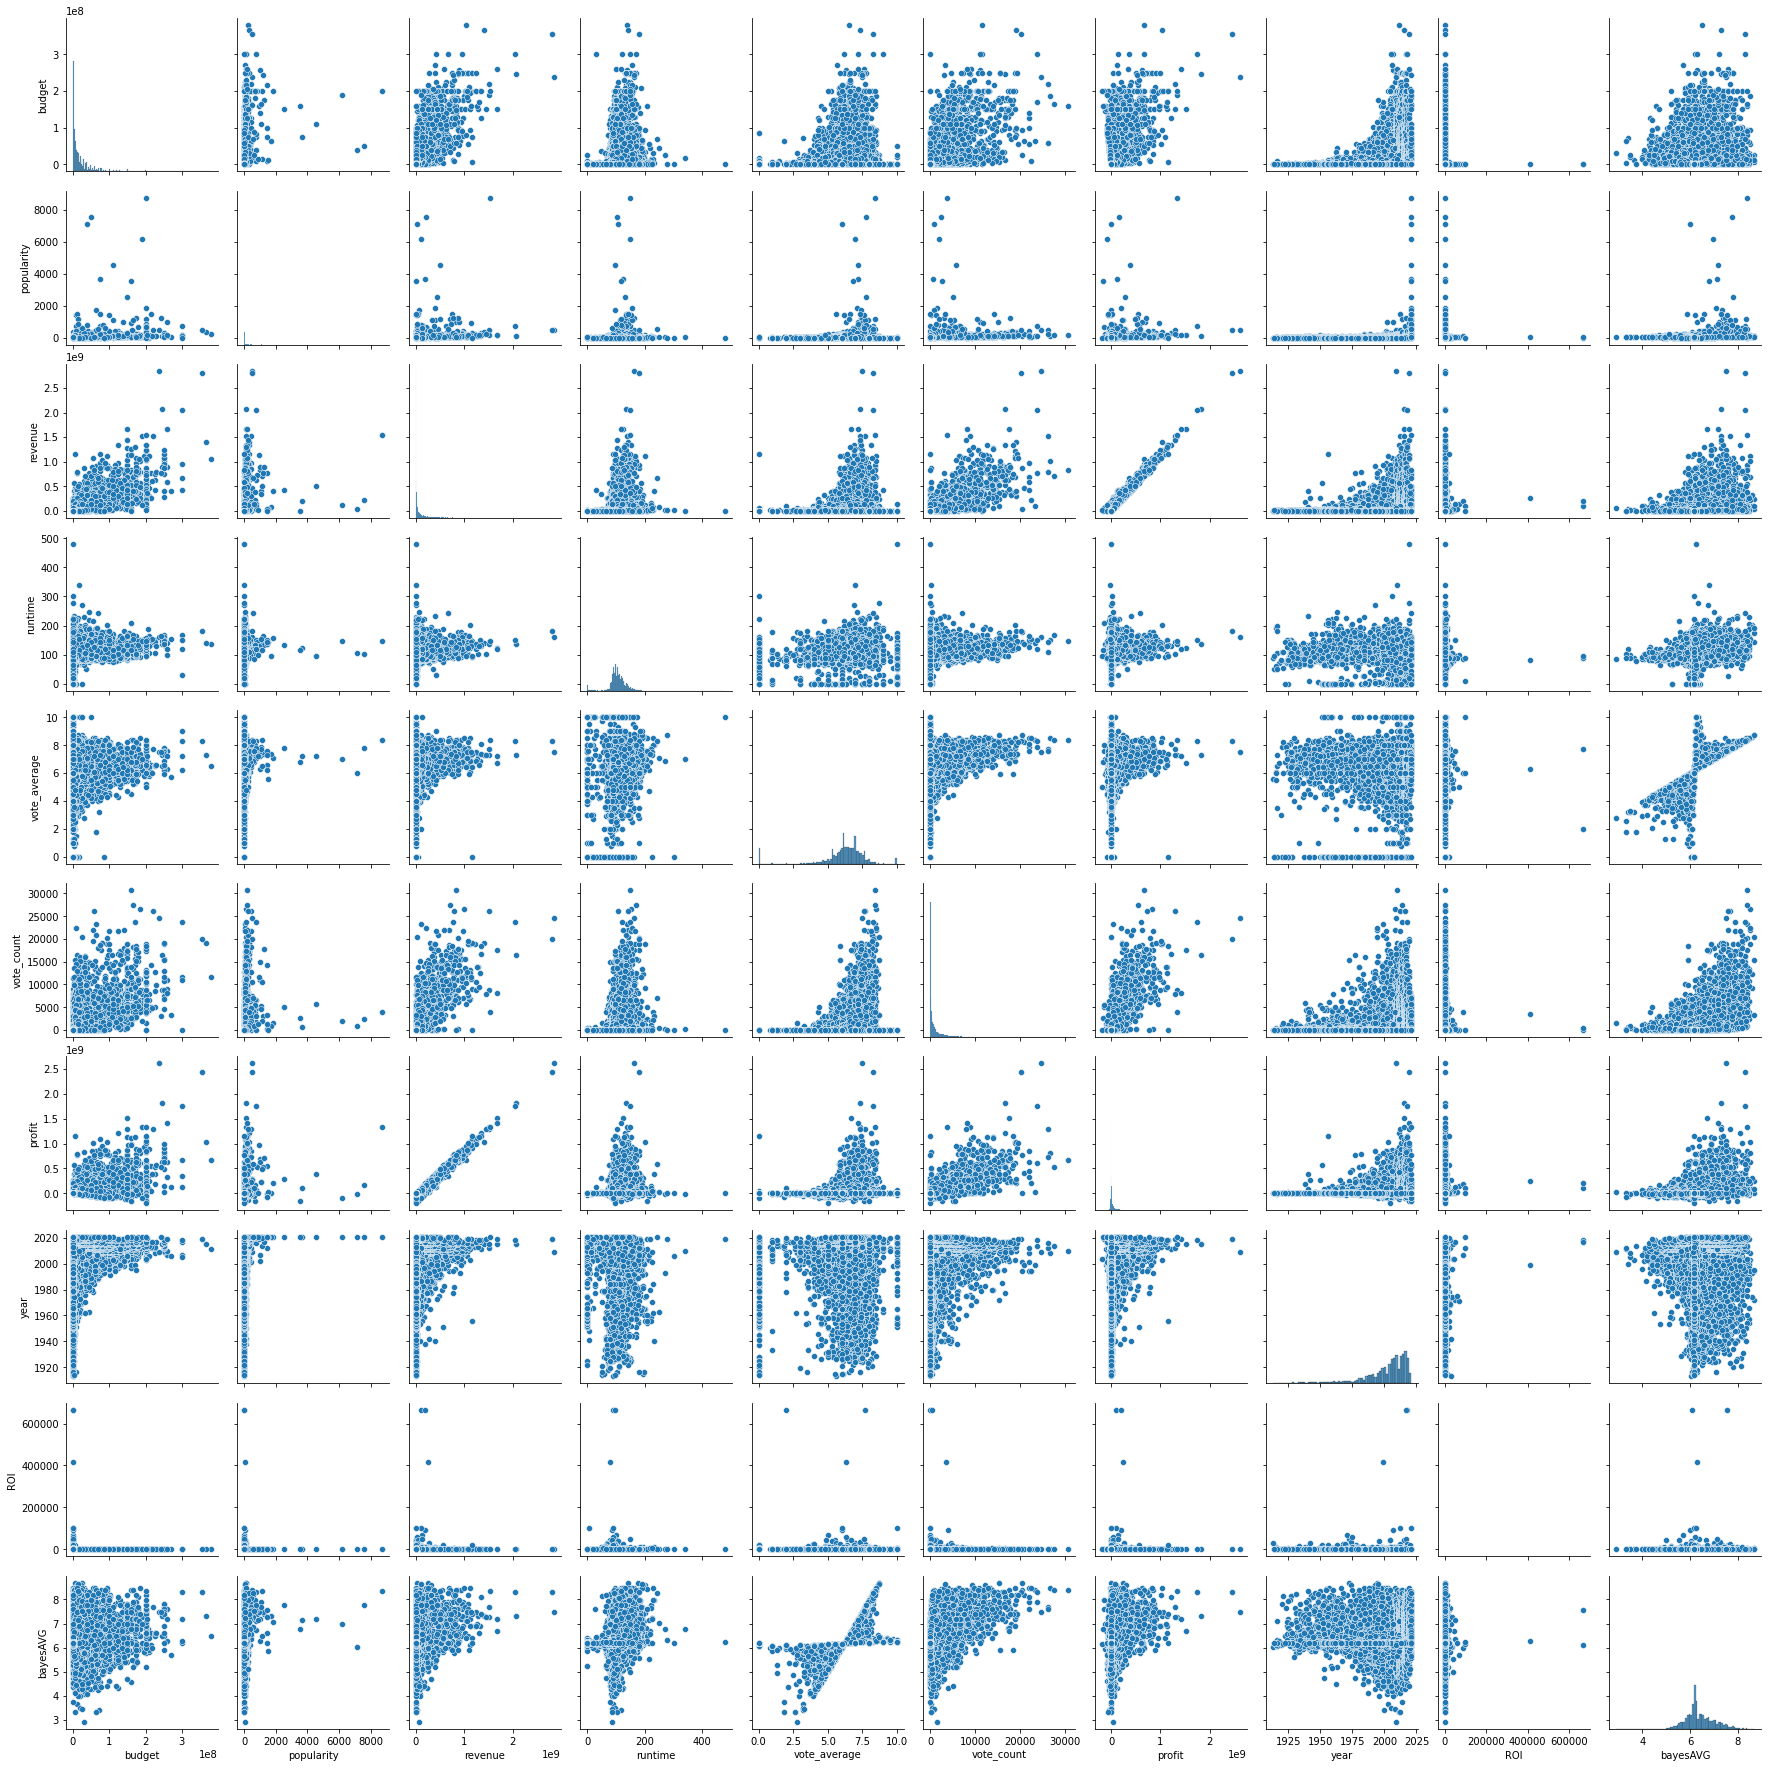

In [9]:
sns.pairplot(df[['budget', 'genre', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'profit', 'year', 'month', 'ROI', 'bayesAVG']])

In [5]:
#0. Distribucion de la relacion entre el presupuesto y el beneficio

data = removeOutliers(df, 'budget', 'profit')

fig = px.scatter(
        data,
        x="budget",
        y='profit',
        height=650,
        width=900
    )

fig.update_xaxes(range=[-2000000, 190000000], row=1, col=1)
fig.show()


NameError: name 'removeOutliers' is not defined

In [5]:
#0. Distribucion de la relacion entre el presupuesto y el beneficio

data = removeOutliers(df, 'budget', 'profit')
fig = px.scatter(
    data,
    x = data["budget"],
    y = data['profit'],
    height=650,
    width=900
)
fig.add_shape(type='line',
              x0=0,
              y0=0,
              x1=200000000,
              y1=0,
              line=dict(color='Yellow'))
fig.update_xaxes(range=[-2000000, 190000000], row=1, col=1)
fig.show()


c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [7]:
#0. Distribucion de la relacion entre el presupuesto y el beneficio

data = removeOutliers(df, 'budget', 'ROI')
fig = px.scatter(
    data,
    x = "budget",
    y = 'ROI',
    height=650,
    width=900
)
fig.update_xaxes(range=[-2000000, 190000000], row=1, col=1)
fig.update_yaxes(range=[-200, 7000], row=1, col=1)
fig.show()


c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [89]:
#0. Distribucion de la relacion entre el presupuesto y el beneficio

data = removeOutliers(df, 'budget', 'ROI')
fig = px.scatter(
    data[data['original_language'] == 'en'],
    x = "budget",
    y = 'ROI',
    height=650,
    width=900
)
fig.update_xaxes(range=[-2000000, 190000000], row=1, col=1)
fig.show()


c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [90]:
#0. Distribucion de la relacion entre el presupuesto y el beneficio

data = removeOutliers(df, 'budget', 'ROI')
fig = px.scatter(
    data[data['original_language'] != 'en'],
    x = "budget",
    y = 'ROI',
    height=650,
    width=900
)
fig.update_xaxes(range=[-2000000, 190000000], row=1, col=1)
fig.show()


c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [11]:
#1. El presupuesto de peliculas ha subido a lo largo de los años
fig = px.line(df.groupby('year').sum().reset_index(), x="year", y="budget")
fig.update_xaxes(range=[1913, 2022], row=1, col=1)
fig.show()

In [99]:
#2. Los ingresos son mayores a mayor duración de la película

data = removeOutliers(df, 'runtime', 'profit')
px.scatter(
    data,
    x = data["runtime"],
    y = data['profit'],
    height=650,
    width=900,
)
fig = px.histogram(
    data,
    x = "runtime",
    y = 'profit',
    height=650,
    width=900,
    #nbins=80,
    labels={
        'profit': 'Total profit',
        'runtime': 'Duration'
    }
)

fig.show()


c:\users\daniel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [84]:
#2 - 2. Los ingresos son mayores a mayor duración de la película

data = removeOutliers(df, 'profit')

#sns.violinplot(x=data['genre'], y=data['profit'].sort_values('profit', ascending=False))

fig = px.box(data.sort_values('profit', ascending=False), x="genre", y="profit")

fig.show()

adult    budget    genre original_language  \
tmdb_id                                               
5        False   4000000    Crime                en   
6        False  21000000   Action                en   
13       False  55000000   Comedy                en   
14       False  15000000    Drama                en   
15       False    839727  Mystery                en   
...        ...       ...      ...               ...   
921976   False     55000    Drama                tr   
921981   False     55000    Drama                tr   
921984   False     75000    Drama                tr   
922260   False    254056  Mystery                ru   
923990   False      1800    Drama                pt   

                                  original_title  \
tmdb_id                                            
5                                     Four Rooms   
6                                 Judgment Night   
13                                  Forrest Gump   
14                               American Beauty   
15                                  Citizen Kane   
...                                          ...   
921976                                    Gurbet   
921981                                 Taş Bebek   
921984                                  Yumurcak   
922260                                    Row 19   
923990   COMO VIVER em um mundo SEM ESPERANÇA???   

                                                  overview  popularity  \
tmdb_id                                                                  
5        It's Ted the Bellhop's first night on the job....      14.892   
6        While racing to a boxing match, Frank, Mike, J...       8.255   
13       A man with a low IQ has accomplished great thi...      64.508   
14       Lester Burnham, a depressed suburban father in...      33.164   
15       Newspaper magnate, Charles Foster Kane is take...      23.480   
...                                                    ...         ...   
921976                                                 NaN       0.600   
921981                                                 NaN       0.600   
921984                                                 NaN       0.600   
922260                                                 NaN      20.664   
923990                                                 NaN       3.357   

                              poster_path release_date    revenue  runtime  \
tmdb_id                                                                      
5        /75aHn1NOYXh4M7L5shoeQ6NGykP.jpg   1995-12-09    4257354     98.0   
6        /rYFAvSPlQUCebayLcxyK79yvtvV.jpg   1993-10-15   12136938    110.0   
13       /saHP97rTPS5eLmrLQEcANmKrsFl.jpg   1994-07-06  677387716    142.0   
14       /wby9315QzVKdW9BonAefg8jGTTb.jpg   1999-09-15  356296601    122.0   
15       /gzYbXKwFMBBoE5lTtGsyLBYwvMs.jpg   1941-04-17   23218000    119.0   
...                                   ...          ...        ...      ...   
921976   /6XYDziFIUyjkw5vy6aOkBHJdPhB.jpg   1959-05-02     100000      0.0   
921981   /ohnc9rKsQjoMMsC83NdRiB6A7YC.jpg   1960-09-02     100000      0.0   
921984   /ptlxpB5SONX2gGCkunS0R5MTt0T.jpg   1961-03-19     100000      0.0   
922260   /8tw8rmA89suHg31ePVdvNYSaV3s.jpg   2021-11-11     254042      0.0   
923990   /cmxb1JMjDNHqIt0KuD7GzNrgbay.jpg   2021-12-22      12500      0.0   

                                                   tagline  \
tmdb_id                                                      
5        Twelve outrageous guests. Four scandalous requ...   
6           Don't move. Don't whisper. Don't even breathe.   
13       Life is like a box of chocolates...you never k...   
14                                            Look closer.   
15                                          It's terrific!   
...                                                    ...   
921976                                                 NaN   
921981                                                 NaN   
921984            

In [12]:

data = removeOutliers(df, 'popularity')
fig = px.scatter(
    data,
    x = "popularity",
    y = 'budget',
    height=650,
    width=900
)

fig.show()

<Figure size 1008x576 with 0 Axes>

In [111]:
#5. Las peliculas de accion son las mas populares
data = removeOutliers(df, 'popularity').groupby('genre').sum().sort_values('popularity', ascending=False).reset_index()
fig = px.bar(
    data,
    x='genre',
    y='popularity'
)
fig.show()


In [112]:
#5. Las peliculas de accion son las mas populares
data = removeOutliers(df, 'popularity').groupby('genre').sum().sort_values('revenue', ascending=False).reset_index()
fig = px.bar(
    data,
    x='genre',
    y='popularity'
)
fig.show()

In [16]:
#3. Las películas más populares son las estrenadas entre Julio y agosto, en periodo de vacaciones
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
df.sort_values('month', inplace=True)

fig = px.line(
    df.groupby('month').sum().reset_index(),
    x='month',
    y='revenue',
)

fig.show()

In [48]:
fig = px.histogram(
    df.groupby('genre').std().sort_values('bayesAVG', ascending=False).reset_index(),
    x='genre',
    y='bayesAVG'
)

fig.show()

In [51]:
df.groupby('genre').describe()

budget                                                   \
                  count          mean           std       min        25%   
genre                                                                      
Action           1398.0  3.783631e+07  5.121818e+07    1000.0  4300000.0   
Adventure         533.0  5.308104e+07  6.333831e+07    1000.0  7000000.0   
Animation         275.0  4.346978e+07  5.372250e+07    1000.0  2358317.5   
Comedy           1875.0  1.686980e+07  2.106701e+07    1000.0  2200000.0   
Crime             414.0  1.735717e+07  2.179564e+07    1000.0  2000000.0   
Documentary       144.0  1.899030e+06  4.460460e+06    1000.0    20000.0   
Drama            2164.0  1.412193e+07  2.022031e+07    1000.0  1300000.0   
Family            190.0  4.674002e+07  5.043966e+07    1000.0  9250000.0   
Fantasy           191.0  4.185221e+07  5.112947e+07    4000.0  6000000.0   
History            52.0  1.590446e+07  1.747602e+07    6000.0  3975000.0   
Horror            567.0  1.194107e+07  1.826252e+07    1000.0  1050000.0   
Music             113.0  1.047165e+07  1.554274e+07    1000.0   100000.0   
Mystery            97.0  1.915536e+07  2.218106e+07    1000.0  2500000.0   
Romance           273.0  1.359321e+07  1.829133e+07    1000.0  1400000.0   
Science Fiction   203.0  4.768385e+07  5.684213e+07    1000.0  6000000.0   
TV Movie            2.0  2.550000e+06  3.464823e+06  100000.0  1325000.0   
Thriller          363.0  2.211118e+07  2.795841e+07    1000.0  2538435.5   
War                86.0  2.470992e+07  3.193129e+07    1000.0  4875000.0   
Western            67.0  1.748709e+07  2.917446e+07    3000.0  2000000.0   

                                                     popularity             \
                        50%         75%          max      count       mean   
genre                                                                        
Action           17000000.0  50000000.0  365000000.0     1398.0  52.315612   
Adventure        27000000.0  75000000.0  380000000.0      533.0  42.452527   
Animation        19000000.0  75000000.0  260000000.0      275.0  89.816658   
Comedy            9000000.0  24312500.0  200000000.0     1875.0  19.692228   
Crime             8250000.0  25000000.0  159000000.0      414.0  19.345082   
Documentary        271535.5   1312500.0   35866397.0      144.0   3.921444   
Drama             6400000.0  20000000.0  185000000.0     2164.0  16.771570   
Family           27000000.0  70000000.0  200000000.0      190.0  42.444968   
Fantasy          20000000.0  57500000.0  258000000.0      191.0  47.802000   
History          10000000.0  20750000.0   70000000.0       52.0  12.026250   
Horror            6000000.0  15000000.0  200000000.0      567.0  44.214825   
Music             2300000.0  15000000.0   90000000.0      113.0   9.923708   
Mystery          10000000.0  25000000.0   84000000.0       97.0  19.001794   
Romance           6000000.0  19000000.0  105000000.0      273.0  19.514425   
Science Fiction  25000000.0  72500000.0  270000000.0      203.0  99.911182   
TV Movie          2550000.0   3775000.0    5000000.0        2.0   7.168500   
Thriller         12000000.0  30000000.0  209000000.0      363.0  24.711140   
War              12000000.0  28525000.0  155000000.0       86.0  18.588279   
Western           6000000.0  19000000.0  145000000.0       67.0  17.566970   

                 ...         ROI                bayesAVG                      \
                 ...         75%            max    count      mean       std   
genre            ...                                                           
Action           ...  259.276999   26150.000000   1398.0  6.289668  0.640463   
Adventure        ...  308.441427   20639.830607    533.0  6.510789  0.703659   
Animation        ...  301.396346   31070.996503    275.0  6.630594  0.698448   
Comedy           ...  331.493962  666566.666667   1875.0  6.252819  0.618951   
Crime            ...  260.464871   31478.947368    414.0  6.615813 

In [55]:
df.sort_values('bayesAVG', ascending=True)

adult    budget      genre original_language  \
tmdb_id                                                 
14164    False  30000000     Action                en   
116977   False  65000000  Animation                en   
76994    False   5000000     Comedy                it   
5491     False  73000000     Action                en   
13805    False  25000000     Comedy                en   
...        ...       ...        ...               ...   
240      False  13000000      Drama                en   
424      False  22000000      Drama                en   
19404    False  13200000     Comedy                hi   
238      False   6000000      Drama                en   
278      False  25000000      Drama                en   

                           original_title  \
tmdb_id                                     
14164                Dragonball Evolution   
116977                         Foodfight!   
76994    Box Office 3D - Il film dei film   
5491                    Battlefield Earth   
13805                      Disaster Movie   
...                                   ...   
240                The Godfather: Part II   
424                      Schindler's List   
19404        दिलवाले दुल्हनिया ले जायेंगे   
238                         The Godfather   
278              The Shawshank Redemption   

                                                  overview  popularity  \
tmdb_id                                                                  
14164    The young warrior Son Goku sets out on a quest...      56.048   
116977   The evil Brand X joins a supermarket that beco...      10.026   
76994    An Italian parody of the biggest U.S. blockbus...       6.738   
5491     In the year 3000, man is no match for the Psyc...      12.284   
13805    The filmmaking team behind the hits "Scary Mov...      16.725   
...                                                    ...         ...   
240      In the continuing saga of the Corleone crime f...      55.889   
424      The true story of how businessman Oskar Schind...      52.214   
19404    Raj is a rich, carefree, happy-go-lucky second...      37.825   
238      Spanning the years 1945 to 1955, a chronicle o...      90.124   
278      Framed in the 1940s for the double murder of h...      90.423   

                              poster_path release_date    revenue  runtime  \
tmdb_id                                                                      
14164     /sunS9xhPnFNP5wlOWrvbpBteAB.jpg   2009-03-12   58228460     85.0   
116977   /to9ggXVyhNTCICHcHMCtFtANd8P.jpg   2012-06-15      73706     87.0   
76994    /xzvzutgoXNPpTELdoH2DWx19oDz.jpg   2011-09-09    2777000    102.0   
5491     /neMUscYddxr4cP8wnRHRMLcWS0A.jpg   2000-05-12   29000000    118.0   
13805    /3J8XKUfhJiNzwobUZVtizXYPe8b.jpg   2008-08-29   14109284     87.0   
...                                   ...          ...        ...      ...   
240      /v3KCBeX0CBlZnHZndimm7taYqwo.jpg   1974-12-20  102600000    202.0   
424      /sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg   1993-11-30  321365567    195.0   
19404    /2CAL2433ZeIihfX1Hb2139CX0pW.jpg   1995-10-20  100000000    190.0   
238      /eEslKSwcqmiNS6va24Pbxf2UKmJ.jpg   1972-03-14  245066411    175.0   
278      /q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg   1994-09-23   28341469    142.0   

                                                   tagline  \
tmdb_id                                                      
14164                            The legend comes to life.   
116977                                                 NaN   
76994                                                  NaN   
5491                                  Take Back The Planet   
13805      Your favorite movies are going to be destroyed.   
...                                                    ...   
240      I don't feel I have to wipe everybody out, Tom...   
424        Whoever saves one life, saves the world entire.   
19404                  Come Fall In love, All Over Again..   
238                  